# Comparative Study of Several ML models on Rainfall Dataset 

## Table of Contents
- Descrition
- About the Data
- Importing Data 
- Data Preprocessing 
- One Hot Encoding 
- Train and Test Data Split 
- Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores.


# Description


In this notebook, we will see all the basic classification algorithms that I learnt and in the end we will see a comparative study of all of them:

We will use the following algorithms:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



### Import the required libraries


In [140]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

### Importing the Dataset


In [141]:
df = pd.read_csv("Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [142]:
df_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_processed.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,False,False,False,False,False,True,False,False,False,False
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,False,False,False,False,False,False,False,False,False,False
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,False,False,False,False,False,False,False,False,False,False
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,False,False,False,False,False,False,False,False,False,False
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,False,False,False,False,False,False,False,True,False,False


Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [143]:
df_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [144]:
df_processed.drop('Date',axis=1,inplace=True)
df_processed = df_processed.astype(float)

In [145]:
features = df_processed.drop(columns='RainTomorrow', axis=1).values
Y = df_processed['RainTomorrow'].values

### Function to calculate Metrics and return a pandas dataframe of it. 

In [146]:
def calc_metrics(model, y_true, y_pred):
    MAE = metrics.mean_absolute_error(y_true, y_pred).round(2)
    MSE = metrics.mean_squared_error(y_true, y_pred).round(2)
    R2 = metrics.r2_score(y_true, y_pred).round(2)
    
    Precision = metrics.precision_score(y_true, y_pred).round(2)
    Recall = metrics.recall_score(y_true, y_pred).round(2)
    F1_Score = f1_score(y_true, y_pred).round(2)
    
    Accuracy_Score = accuracy_score(y_true, y_pred).round(2)
    
    JaccardIndex = jaccard_score(y_true, y_pred).round(2)

    _report = {
        'Model': [model],
        'MAE': [MAE],
        'MSE': [MSE], 
        'R2': [R2],
        'Accuracy': [Accuracy_Score],
        'Jaccard Index': [JaccardIndex],
        'Precision': [Precision],
        'Recall': [Recall],
        'F1 Score': [F1_Score]
    }
    return pd.DataFrame(_report)
    

### Data Splitting

Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [147]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, random_state=10, test_size=0.2)

### Linear Regression


Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [210]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [211]:
predictions = LinearReg.predict(x_test)
# predictions_in_binary = np.rint(predictions)

### Finding Threshold

In [212]:
# This function will generate predictions with several thresholds
# Returns the matrix of predictictions and list thresolds
def getBinPredsAndThresh(thresh_lb, thres_ub, divs):
    thresholds = np.linspace(thresh_lb, thres_ub, divs)
    list_preds_bin = np.empty(shape = (thresholds.shape[0], predictions.shape[0]))
    i = 0
    for threshold in thresholds:
        list_preds_bin[i] = np.where(predictions < threshold, 0, 1)
        i += 1
    # display(list_predictions_binary)
    # display(thresholds.shape, predictions.shape, list_predictions_binary.shape)
    return (list_preds_bin, thresholds)

# This function generates the dataframe of metrics called reports  
# corresponding to the predictions and adds thresolf column to it 
def generate_reports(list_preds_bin, thresholds):
    Reports = calc_metrics('Linear Regression', y_test, list_preds_bin[0])
    for predictions_binary in list_preds_bin[1:]:
         Reports = pd.concat([Reports, calc_metrics('Linear Regression', y_test, predictions_binary)]) 
    Reports['Threshold'] = thresholds
    # display(Reports)
    return Reports

# Here we plot the metrics vs thresholds
from matplotlib import pyplot as plt
def getPlot(Reports):
    plt.clf()
    X = Reports['Threshold']
    Y = Reports[['MAE', 'MSE', 'R2', 'Accuracy', 'Jaccard Index', 'Precision', 'Recall', 'F1 Score']]
    Columns = Y.columns
    for col in Columns: 
        plt.plot(X, Y[col], label=col)
    plt.legend(loc=3,bbox_to_anchor=(1,0))
    return plt

# Here we call all the functions and show the plot at last
def displayPlotBetween(lb, ub, divs):
    list_predictions_binary, thresholds = getBinPredsAndThresh(lb, ub, divs)
    Reports = generate_reports(list_predictions_binary, thresholds)
    plot = getPlot(Reports)
    plot.show()

Now, we will find the appropriate threshold for classification as regression model outputs only continuous values. We will do this by observing the several metrics around 0.5 threshold value for classification.
Our interval of interest is [0, 1] as values close to 0 mean no rain and values close to 1 mean rain. We can guess by intuition (and also by graphs) that appropriate threshold may lie near 0.5.  

Below we can see a general trend. Here our most valuable metric is F1 and as we can see in the graph it is maximised at around 0.4. Around here we also see that R2 is large as well and MAE, MSE are small. Now let us zoom to that area in next iteration.

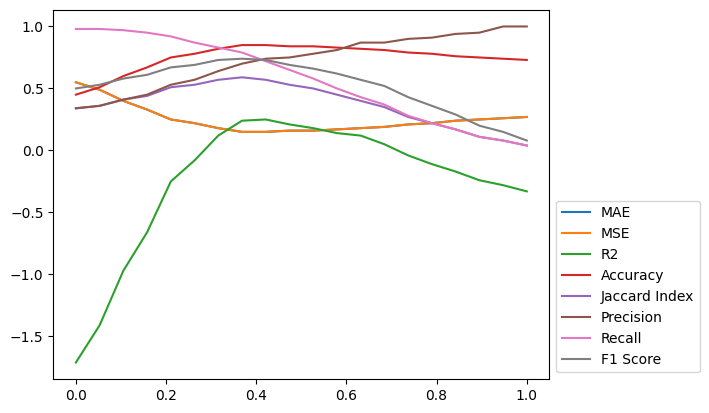

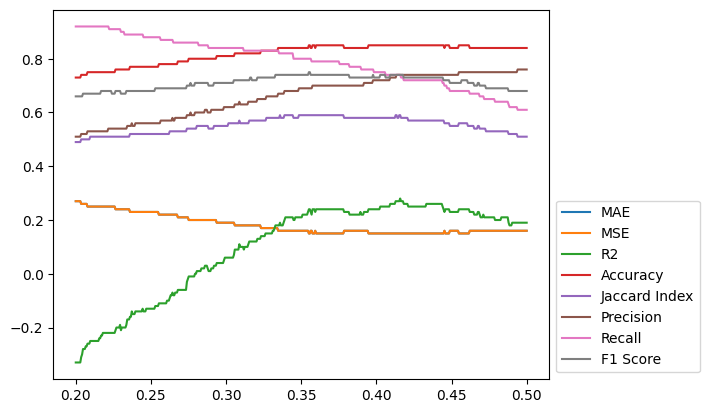

In [213]:
displayPlotBetween(0, 1, 20)
displayPlotBetween(0.2, 0.5, 500) #More division means more Resolution 

In graph below we can more clearly see that we need a value of thresold slightly less than 0.42 as at that point we get max F1, Acc, Jacc and min MAE, MSE.

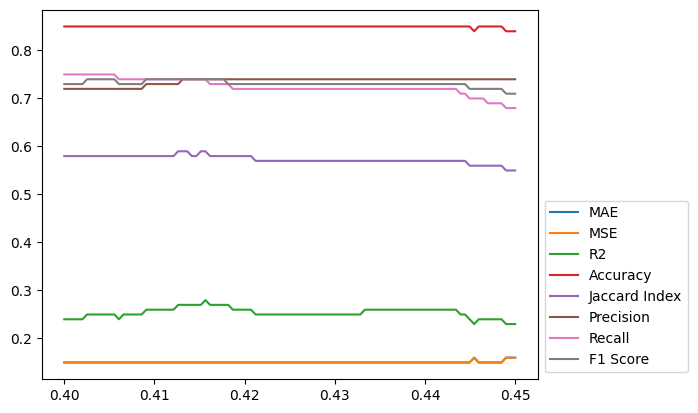

In [214]:
displayPlotBetween(0.4, 0.45, 100)

From the graph below we can choose a thresold value of 0.4155 as that is where we get good metrics. Also most of the time after we get rough estimation of parameters we then just automate the process of finding them using several techniques. Here I have used graphs as this was a simple case and I am comfortable with graphs as well. 

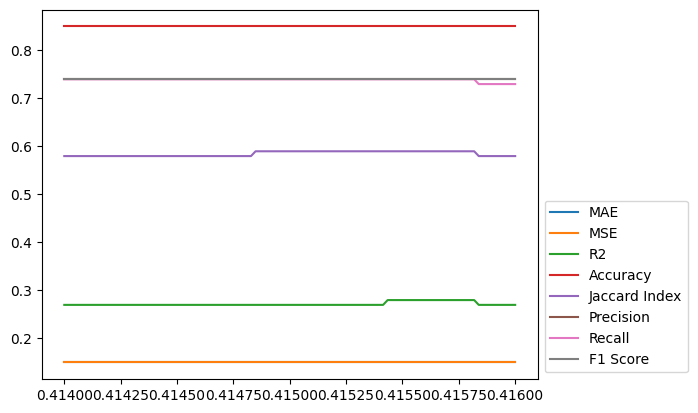

In [215]:
displayPlotBetween(0.414, 0.416, 100)

Using the `predictions` and the `y_test` dataframe to calculate the value for each metric using the appropriate function and show the report.


In [216]:
predictions_in_binary = np.where(predictions < 0.4155, 0, 1)
Report = calc_metrics('Linear Regression', y_test, predictions_in_binary)
Report

,Model,MAE,MSE,R2,Accuracy,Jaccard Index,Precision,Recall,F1 Score
0,Linear Regression,0.15,0.15,0.28,0.85,0.59,0.74,0.74,0.74


### KNN


Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `5`.


In [217]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)

KNeighborsClassifier()

Now using the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [218]:
predictions2 = KNN.predict(x_test)

Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function and show the report.


In [219]:
Report2 = calc_metrics('KNN', y_test, predictions2)
Report2

,Model,MAE,MSE,R2,Accuracy,Jaccard Index,Precision,Recall,F1 Score
0,KNN,0.18,0.18,0.11,0.82,0.47,0.74,0.56,0.64


### Decision Tree


Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [220]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)

DecisionTreeClassifier()

Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [221]:
predictions3 = Tree.predict(x_test)

Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function and show the report.


In [222]:
Report3 = calc_metrics('Decision Tree', y_test, predictions3)
Report3

,Model,MAE,MSE,R2,Accuracy,Jaccard Index,Precision,Recall,F1 Score
0,Decision Tree,0.24,0.24,-0.2,0.76,0.41,0.56,0.59,0.58


### Logistic Regression


Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [224]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [225]:
predictions4 = LR.predict(x_test)

In [226]:
predict_proba = LR.predict_proba(x_test)

Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function and show the report.


In [227]:
LR_Log_Loss = log_loss(y_test, predict_proba)
Report4 = calc_metrics('Logistic Regression', y_test, predictions4)
Report4['Log_Loss'] = [LR_Log_Loss]
Report4

,Model,MAE,MSE,R2,Accuracy,Jaccard Index,Precision,Recall,F1 Score,Log_Loss
0,Logistic Regression,0.16,0.16,0.19,0.84,0.52,0.75,0.62,0.68,0.356993


### SVM


Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [228]:
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [229]:
predictions5 = SVM.predict(x_test)

Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function and show the report.


In [230]:
Report5 = calc_metrics('SVM', y_test, predictions5)
Report5

,Model,MAE,MSE,R2,Accuracy,Jaccard Index,Precision,Recall,F1 Score
0,SVM,0.16,0.16,0.2,0.84,0.52,0.76,0.61,0.68


### Report


Show the Accuracy, Jaccard Index, F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [231]:
FinalReport = pd.concat([Report, Report2, Report3, Report4, Report5], ignore_index=True)
FinalReport

,Model,MAE,MSE,R2,Accuracy,Jaccard Index,Precision,Recall,F1 Score,Log_Loss
0,Linear Regression,0.15,0.15,0.28,0.85,0.59,0.74,0.74,0.74,NaN
1,KNN,0.18,0.18,0.11,0.82,0.47,0.74,0.56,0.64,NaN
2,Decision Tree,0.24,0.24,-0.20,0.76,0.41,0.56,0.59,0.58,NaN
3,Logistic Regression,0.16,0.16,0.19,0.84,0.52,0.75,0.62,0.68,0.356993
4,SVM,0.16,0.16,0.20,0.84,0.52,0.76,0.61,0.68,NaN


__Conclusions:__ 
- Here, although I have used R2 score but it is really not a good metric for classification tasks. It is much better used for Regression Tasks with continuous values. Hence, we will not take R2 into account here but still you can take look if you want.
- We can see that the worst performer is `Decision Tree` as not only MAE, MSE are higher than other models but Acc., Jacc. and F1 are less then other models. There `Decision Tree` is not fit for our job.
- We see models `SVM`, `Logistic Reg.` and `Lin. Reg.` show similar performance. Out of these three: `Linear Reg.` has least `MAE` and `MSE`and have highest `acc.`
- Also `Lin. Reg.` has higher `Jacc.`, `precision`, `recall` and `F1`.
- Although KNN has comparable `acc.` of 0.82 but it shows much less `Recall` and hence, `F1` is also less. Also `MAE` and `MSE` are large as well.  
- Therefore, in this condition we can choose `Lin. Reg.` for our classification and optimize it further for the task. 
- However, since the `Logistic Regression` and `SVM` also performed quite well and close to top we can also experiment with them to look for improvements as well. Here I only experimented with `Lin. Reg.` in depth get the task done

**Results of `Linear Regression` might change on rerun as I calculated the threshold for classification manually using graphs. So take care of that.**